In [6]:
import sys 
sys.path.append('../')
sys.path.append('../../')
import numpy as np
import itertools
import math
import networkx as nx
import matplotlib.pyplot as plt
from core.pse import pseudo_embedding
from networkx.drawing.nx_pydot import graphviz_layout

In [12]:
def get_errors(D):
  D = D**2
  n = D.shape[0]
  err = np.zeros(n-1)
  for dim in range(1,n):
      X, tk = pseudo_embedding(D, dim=dim)
      print(tk)
      rec = np.zeros((n, n))
      for i in range(n):
          for j in range(n):
              rec[i,j] = np.abs(np.linalg.norm(X[i,:tk]-X[j,:tk])**2 - np.linalg.norm(X[i,tk:]-X[j,tk:])**2)
              if i != j:
                  err[dim-1] += np.abs((np.sqrt(D[i,j])-np.sqrt(rec[i,j])))/np.sqrt(D[i,j])
                  #err += np.abs((np.sqrt(D[i,j])-np.sqrt(rec[i,j])))/np.sqrt(D[i,j])
      err[dim-1]/= (n*(n-1))
      #err/= (n*(n-1))
  return err

In [3]:
from collections import defaultdict 
import networkx as nx 
def get_D_Tree(n_branches,branch_size):
  n = n_branches*branch_size - (n_branches-1)
  D_tree = np.zeros((n,n))
  print(D_tree.shape)
  branches = defaultdict(list)

  N=1
  n2b = {}
  A = np.zeros((n,n))

  for i in range(n_branches):
    
    branch_nodes = [0] + [j for j in range(N,N+branch_size-1)]
    #print(branch_nodes)
    b = branch_nodes
    for j in range(branch_size-1):
      #print(j)
      A[b[j]][b[j+1]] = 1
      A[b[j+1]][b[j]] = 1
    N = N + branch_size-1
  return A 

A = get_D_Tree(3,3)
G = nx.from_numpy_array(A)
D_tree = nx.floyd_warshall_numpy(G)

print(D_tree) 
X, tk = pseudo_embedding(D_tree*D_tree, dim=3)
print(X,tk)


(7, 7)
[[0. 1. 2. 1. 2. 1. 2.]
 [1. 0. 1. 2. 3. 2. 3.]
 [2. 1. 0. 3. 4. 3. 4.]
 [1. 2. 3. 0. 1. 2. 3.]
 [2. 3. 4. 1. 0. 3. 4.]
 [1. 2. 3. 2. 3. 0. 1.]
 [2. 3. 4. 3. 4. 1. 0.]]
[[ 0.          0.          0.        ]
 [-1.1535415   0.0517238  -0.57735027]
 [-2.30708299  0.10344759 -1.15470054]
 [ 0.62156487  0.97313434 -0.57735027]
 [ 1.24312974  1.94626868 -1.15470054]
 [ 0.53197663 -1.02485814 -0.57735027]
 [ 1.06395325 -2.04971628 -1.15470054]] 2


In [ ]:
D_square = np.array([[0,1,2,1],[1,0,1,1],[2,1,0,1],[1,1,1,0]])


errs_tree_1  = get_errors(D_tree)

G2 = nx.binomial_tree(n=5)
D_tree_2 = nx.floyd_warshall_numpy(G2)

errs_tree_2 = get_errors(D_tree_2)
print(errs_tree_2)

/tmp/ipykernel_1001859/2483823558.py:45: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G2, prog="dot")


31
31


<Figure size 640x480 with 0 Axes>

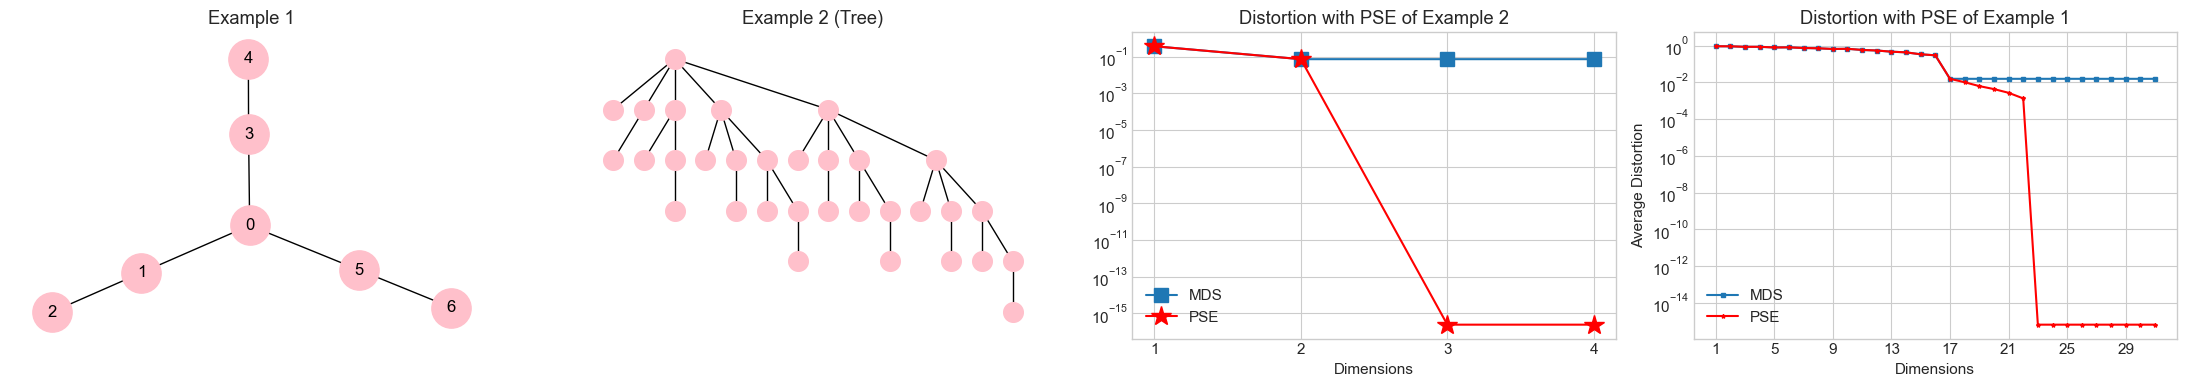

In [21]:
import matplotlib.pyplot as plt 

plt.style.use('seaborn-whitegrid')
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = 11

plt.figure()
fix, axs  = plt.subplots(1,4,figsize=(22,4))


axs[0].set_title('Example 1')

edges = [['0', '1'], ['1', '2'], ['0', '3'],['3','4'],['0','5'],['5','6']]
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)


nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=800, node_color='pink', alpha=1.0,
    labels={node: node for node in G.nodes()},ax=axs[0]
)



mds_errs_tree = errs_tree_1[:2].tolist() + [errs_tree_1[1]]*2
axs[2].semilogy(list(range(1,len(mds_errs_tree)+1)), mds_errs_tree, marker='s',markersize=10,label='MDS')

axs[2].semilogy(list(range(1,5)), errs_tree_1[:4],marker='*',markersize=15,color='red',label='PSE')
axs[2].set_xlabel('Dimensions')
#axs[3].set_ylabel('Average Distortion')
axs[2].set_xticks([1,2,3,4])
axs[2].set_title('Distortion with PSE of Example 2')
axs[2].legend()




axs[1].set_title('Example 2 (Tree)')

#G = nx.binomial_tree(n=5)
#G.add_edges_from(edges)
#pos = nx.spring_layout(G)
pos = graphviz_layout(G2, prog="dot")
#nx.draw(G, pos)

nx.draw(
    G2, pos, edge_color='black', width=1, linewidths=1,
    node_size=200, node_color='pink', alpha=1.0,
     ax=axs[1]
)




mds_errs_t2 = errs_tree_2[:16].tolist() + [errs_tree_2[16]]*(len(errs_tree_2)-16)

axs[3].semilogy(list(range(1,len(mds_errs_t2)+1)), mds_errs_t2, marker='s',markersize=3,label='MDS')
print(len(mds_errs_t2))
errs_t2_pse = errs_tree_2.tolist() #+ [errs_tree_2[16]]
print(len(errs_t2_pse))
axs[3].semilogy(list(range(1,len(errs_tree_2)+1)), errs_tree_2,marker='*',markersize=3,color='red',label='PSE')
axs[3].set_xlabel('Dimensions')
axs[3].set_ylabel('Average Distortion')
axs[3].set_xticks(np.arange(1,len(errs_tree_2),4))
axs[3].set_title('Distortion with PSE of Example 2')
axs[3].legend()


#plt.savefig('tree_square.jpg', dpi=300)

plt.tight_layout()
#plt.legend()
plt.savefig('../figures/pse-examples.jpg', dpi=300,transparent=True)
